In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MO1/data.csv", names=['x1', 'x2', 'x3', 'y'])

#1. (a-d) Обучите линейную регрессию для x=1,2, 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["x1"]], df["y"])

In [ ]:
model = LinearRegression()
model.fit(np.array(df.loc[:, "x1"]).reshape(-1, 1), df["y"])
preds = model.predict(np.array(df.loc[:, "x1"]).reshape(-1, 1))


<Axes: xlabel='x1', ylabel='y'>

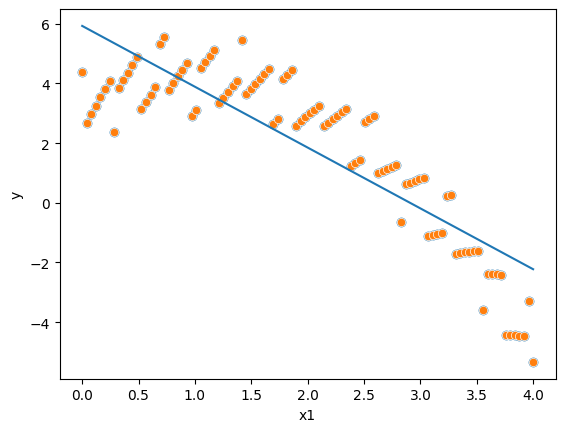

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x1"],df["y"])
sns.scatterplot(ax=ax, x=df["x1"], y=df["y"])
sns.lineplot(ax=ax, x=df["x1"], y=preds)

In [ ]:
y_pred = model.predict(X_test)
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

mean squared error:  1.3332078667567324
mean absolute error:  0.9799156067525949


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
X = df[['x1']]
y = df['y']

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()
print(f'Mean MSE: {mean_mse:.4f}')
print(f'Var MSE: {std_mse ** 2:.4f}')
print(f'Std MSE: {std_mse:.4f}')

Mean MSE: 5.7647
Var MSE: 22.4368
Std MSE: 4.7367


In [ ]:
def bias_var(X, y):
  degrees = range(1, 7)

  bias_values = []
  variance_values = []

  for degree in degrees:
      pipeline = Pipeline([
          ('polynomial_features', PolynomialFeatures(degree=degree)),
          ('linear_regression', LinearRegression())
      ])

      scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

      bias = np.mean(scores)
      variance = np.var(scores)

      bias_values.append(bias)
      variance_values.append(variance)

  plt.figure(figsize=(10, 6))
  plt.plot(degrees, bias_values, label='Смещение')
  plt.plot(degrees, variance_values, label='Дисперсия')
  plt.xlabel('Степень полинома')
  plt.ylabel('Значение')
  plt.title('График смещения и дисперсии для полиномиальной регрессии')
  plt.legend()
  plt.show()

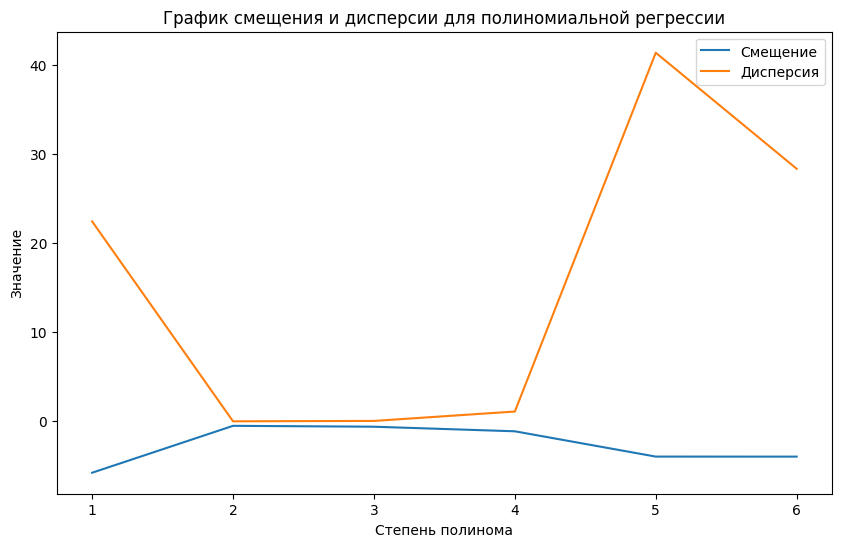

In [ ]:
bias_var(df[['x1']], df['y'])

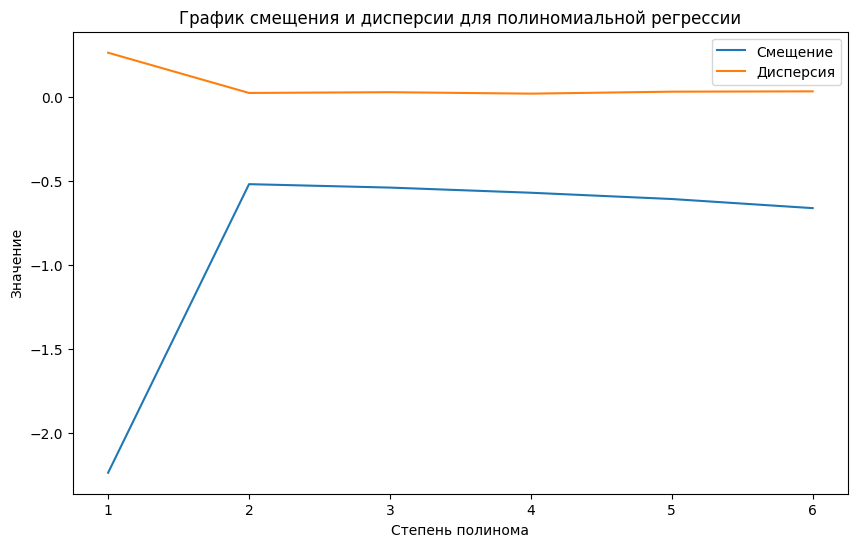

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1']], df['y'], test_size=0.3)
bias_var(X_train, y_train)

In [ ]:
best_degree = 1
degrees = np.arange(1, 7)
best_mse = 100000

for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)
    y_pred = lin_reg_poly.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Оптимальная степень полинома:", best_degree)
print("mean squared error на тренировочном наборе:", best_mse)

y_pred_test = lin_reg_poly.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mean squared error на тестовом наборе:", mse_test)

Оптимальная степень полинома: 2
mean squared error на тренировочном наборе: 0.4820690446668806
mean squared error на тестовом наборе: 0.4960541158689045


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["x2"]], df["y"])

In [ ]:
model = LinearRegression()
model.fit(np.array(df.loc[:, "x2"]).reshape(-1, 1), df["y"])
preds = model.predict(np.array(df.loc[:, "x2"]).reshape(-1, 1))

<Axes: xlabel='x2', ylabel='y'>

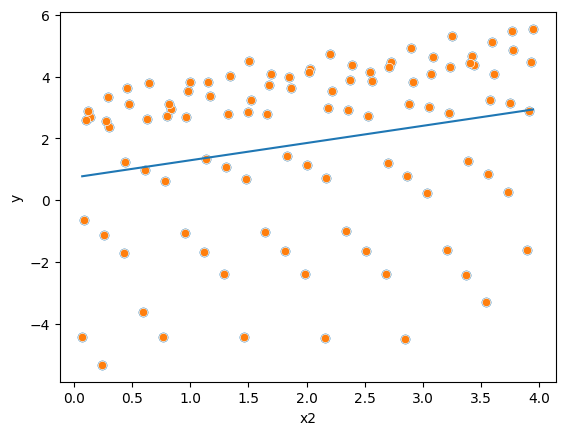

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x2"],df["y"])
sns.scatterplot(ax=ax, x=df["x2"], y=df["y"])
sns.lineplot(ax=ax, x=df["x2"], y=preds)

In [ ]:
y_pred = model.predict(X_test)
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

mean squared error:  6.255982813667953
mean absolute error:  2.1494029766052516


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


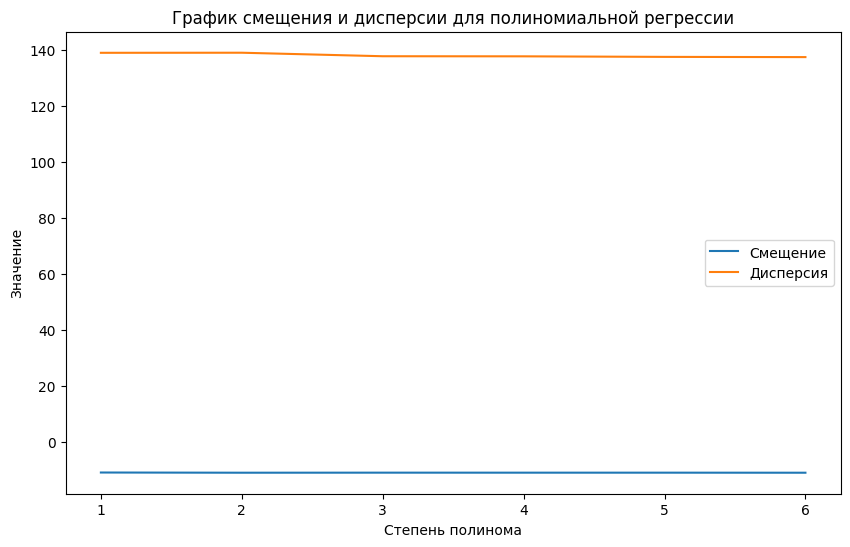

In [ ]:
bias_var(df[['x2']], df['y'])

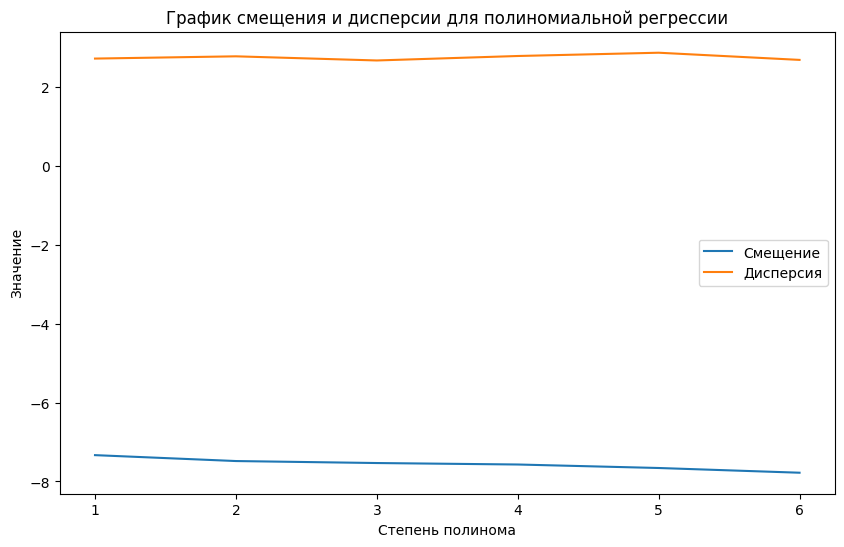

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x2']], df['y'], test_size=0.3)
bias_var(X_train, y_train)

In [ ]:
best_degree = 1
degrees = np.arange(1, 7)
best_mse = 100000

for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)
    y_pred = lin_reg_poly.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Оптимальная степень полинома:", best_degree)
print("mean squared error на тренировочном наборе:", best_mse)

y_pred_test = lin_reg_poly.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mean squared error на тестовом наборе:", mse_test)

Оптимальная степень полинома: 1
mean squared error на тренировочном наборе: 7.988504695722467
mean squared error на тестовом наборе: 8.642277464834724


In [ ]:
X = df[['x2']]
y = df['y']

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()
print(f'Mean MSE: {mean_mse:.4f}')
print(f'Var MSE: {std_mse ** 2:.4f}')
print(f'Std MSE: {std_mse:.4f}')

Mean MSE: 10.8841
Var MSE: 138.9796
Std MSE: 11.7890


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["x3"]], df["y"])

In [ ]:
model = LinearRegression()
model.fit(np.array(df.loc[:, "x3"]).reshape(-1, 1), df["y"])
preds = model.predict(np.array(df.loc[:, "x3"]).reshape(-1, 1))

<Axes: xlabel='x3', ylabel='y'>

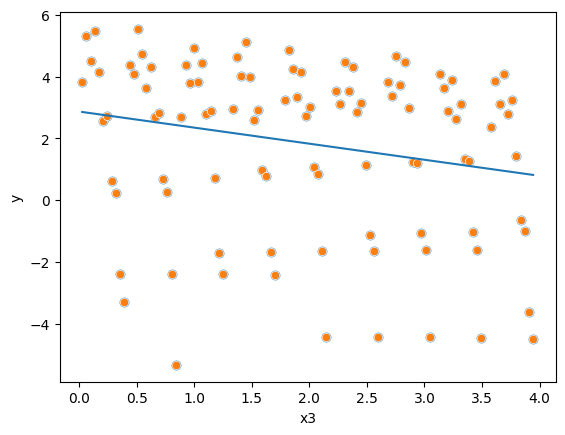

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x3"],df["y"])
sns.scatterplot(ax=ax, x=df["x3"], y=df["y"])
sns.lineplot(ax=ax, x=df["x3"], y=preds)

In [ ]:
y_pred = model.predict(X_test)
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

mean squared error:  10.348745387233173
mean absolute error:  2.651199840309744


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


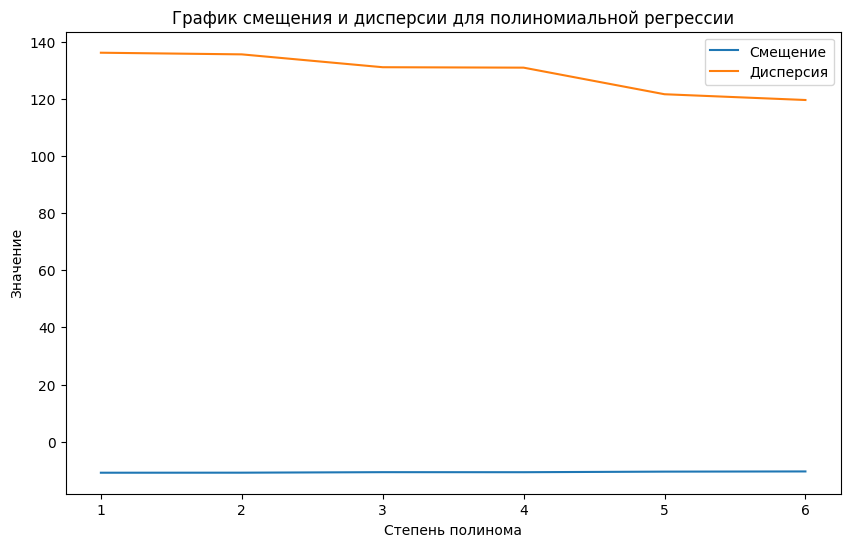

In [ ]:
bias_var(df[['x3']], df['y'])

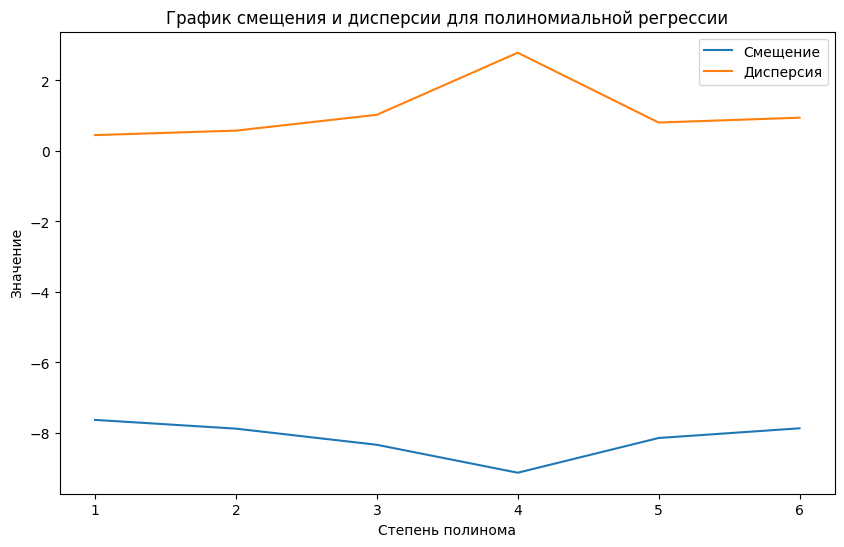

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x3']], df['y'], test_size=0.3)
bias_var(X_train, y_train)

In [ ]:
best_degree = 1
degrees = np.arange(1, 7)
best_mse = 100000

for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)
    y_pred = lin_reg_poly.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Оптимальная степень полинома:", best_degree)
print("mean squared error на тренировочном наборе:", best_mse)

y_pred_test = lin_reg_poly.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mean squared error на тестовом наборе:", mse_test)

Оптимальная степень полинома: 2
mean squared error на тренировочном наборе: 7.222146871408444
mean squared error на тестовом наборе: 8.55460608268914


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["x1", "x2", "x3"]], df["y"])

In [ ]:
model = LinearRegression()
model.fit(df[["x1", "x2", "x3"]], df["y"])
preds = model.predict(df[["x1", "x2", "x3"]])

<Axes: xlabel='x1', ylabel='y'>

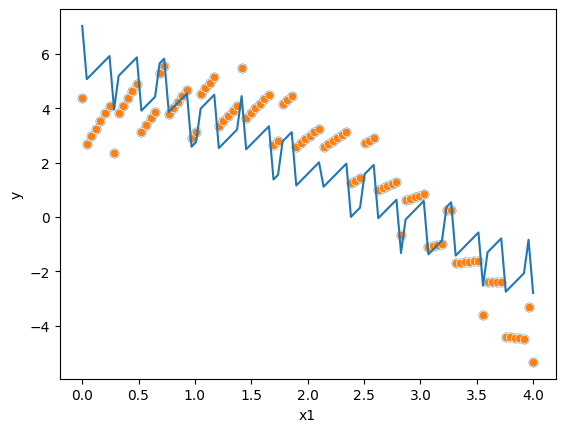

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x1"],df["y"])
sns.scatterplot(ax=ax, x=df["x1"], y=df["y"])
sns.lineplot(ax=ax, x=df["x1"], y=preds)


b. Используя кросс-валидацию и среднеквадратичную функцию потерь, оцените точность и способность к генерализации у модели

In [ ]:
y_pred = model.predict(X_test)
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

mean squared error:  1.6861465508794113
mean absolute error:  1.1299172203424854


In [ ]:
X = df[['x3']]
y = df['y']

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()
print(f'Mean MSE: {mean_mse:.4f}')
print(f'Var MSE: {std_mse ** 2:.4f}')
print(f'Std MSE: {std_mse:.4f}')

Mean MSE: 10.8676
Var MSE: 136.0956
Std MSE: 11.6660


# 2 Повторить пункты а-d для х=1,2,3

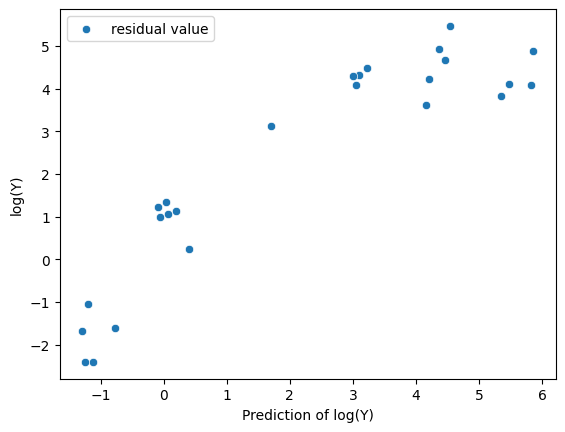

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["x1", "x2", "x3"]], df["y"])
model_all = LinearRegression()
model_all.fit(X_train, y_train)
preds = model_all.predict(X_test)
sns.scatterplot(x=preds, y=y_test, label="residual value")
plt.xlabel('Prediction of log(Y)')
plt.ylabel('log(Y)')
plt.legend()
plt.show()

In [ ]:
print(f"The score of prediction is: {model.score(X_test, y_test)}")

The score of prediction is: 0.8344183460077649


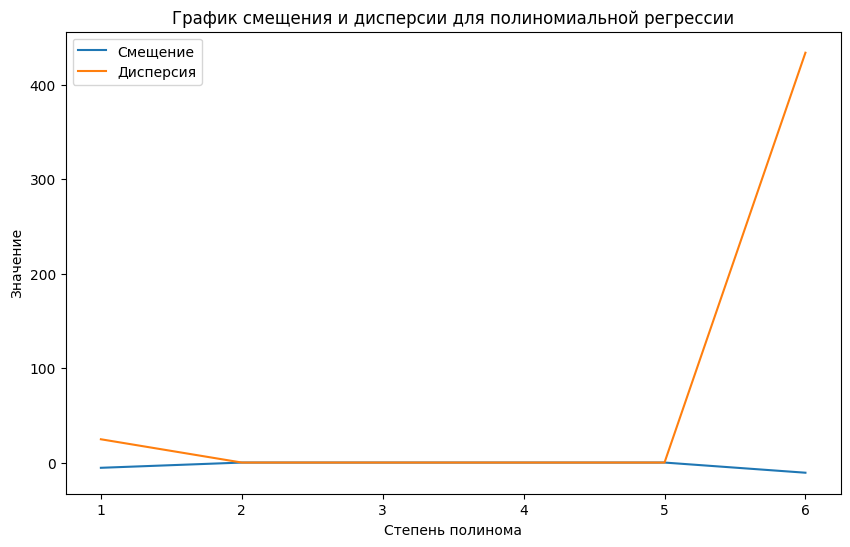

In [ ]:
bias_var(df[['x1', 'x2', 'x3']], df['y'])

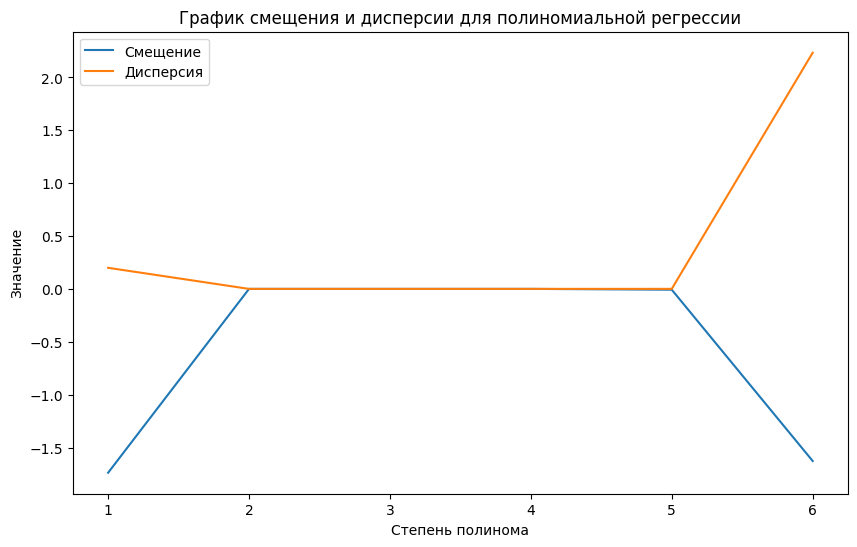

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2', 'x3']], df['y'], test_size=0.3)
bias_var(X_train, y_train)

In [ ]:
best_degree = 1
degrees = np.arange(1, 7)
best_mse = 100000

for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)
    y_pred = lin_reg_poly.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Оптимальная степень полинома:", best_degree)
print("mean squared error на тренировочном наборе:", best_mse)

y_pred_test = lin_reg_poly.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mean squared error на тестовом наборе:", mse_test)

Оптимальная степень полинома: 2
mean squared error на тренировочном наборе: 1.4996600179361202e-29
mean squared error на тестовом наборе: 0.26476963931179115


In [ ]:
X = df[['x1', 'x2', 'x3']]
y = df['y']

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()
print(f'Mean MSE: {mean_mse:.4f}')
print(f'Var MSE: {std_mse ** 2:.4f}')
print(f'Std MSE: {std_mse:.4f}')

Mean MSE: 5.5548
Var MSE: 24.6457
Std MSE: 4.9644


# 3 Рассмотрим линейную регрессию, построенную для фиксированного набора базисных функций...

In [ ]:
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def create_matrix(X, mu, sigma):
    phi = np.column_stack([gaussian_basis_function(X, mu, sigma) for mu in mu])
    return phi

In [ ]:
mu = np.linspace(-1, 1, num=2, endpoint=True)
sigma = mu[1] - mu[0]

phi = create_matrix(df[['x1', 'x2', 'x3']], mu, sigma)

model = LinearRegression()
model.fit(phi, df['y'])

y_pred = model.predict(phi)
print("mean squared error: ", mean_squared_error(df['y'], y_pred))
print("mean absolute error: ", mean_absolute_error(df['y'], y_pred))

mean squared error:  0.10351966695510034
mean absolute error:  0.26772883730168606


<Axes: xlabel='x1', ylabel='y'>

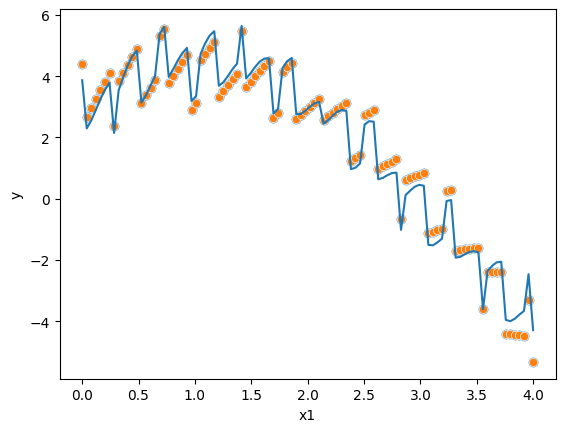

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x1"],df["y"])
sns.scatterplot(ax=ax, x=df["x1"], y=df["y"])
sns.lineplot(ax=ax, x=df["x1"], y=y_pred)

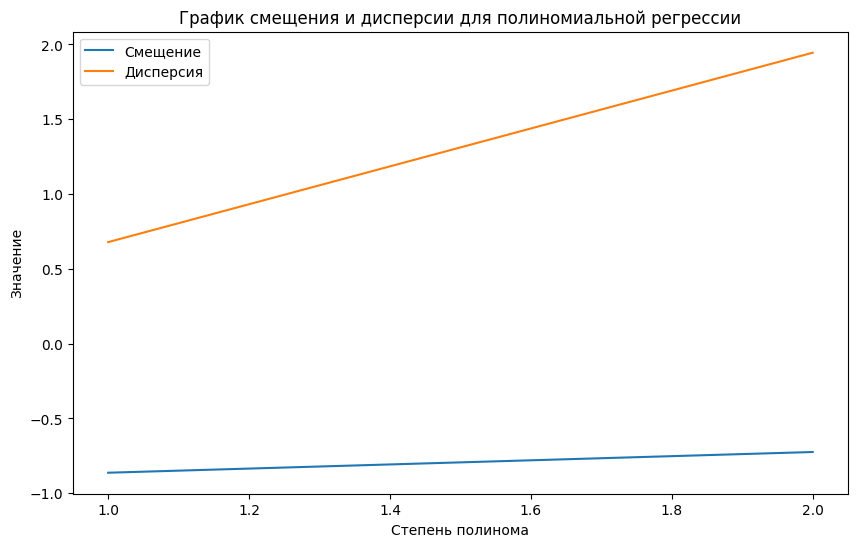

In [ ]:
X=phi
y=df['y']
degrees = range(1, 3)

bias_values = []
variance_values = []

for degree in degrees:
    pipeline = Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

    bias = np.mean(scores)
    variance = np.var(scores)

    bias_values.append(bias)
    variance_values.append(variance)

plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_values, label='Смещение')
plt.plot(degrees, variance_values, label='Дисперсия')
plt.xlabel('Степень полинома')
plt.ylabel('Значение')
plt.title('График смещения и дисперсии для полиномиальной регрессии')
plt.legend()
plt.show()

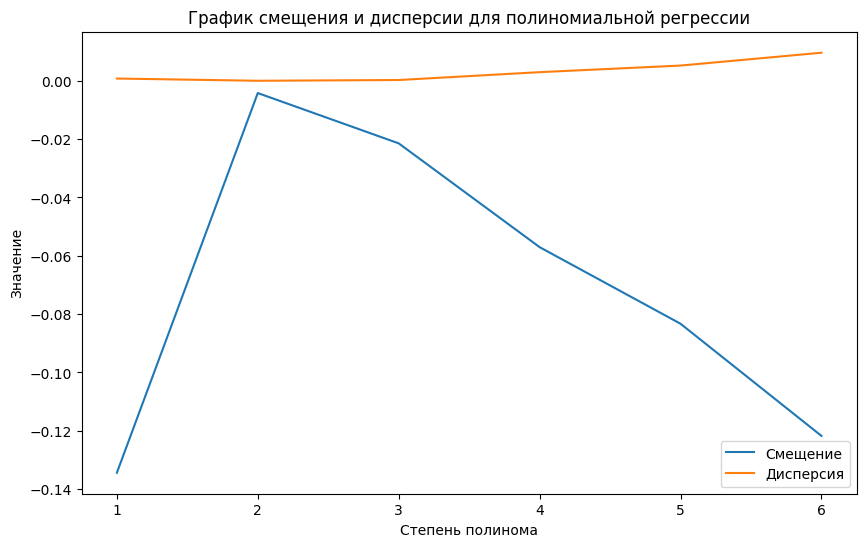

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(phi, df['y'], test_size=0.3)
bias_var(X_train, y_train)

In [ ]:
model = LinearRegression()
model.fit(phi, y)
y_pred = model.predict(phi)

<Axes: xlabel='x2', ylabel='y'>

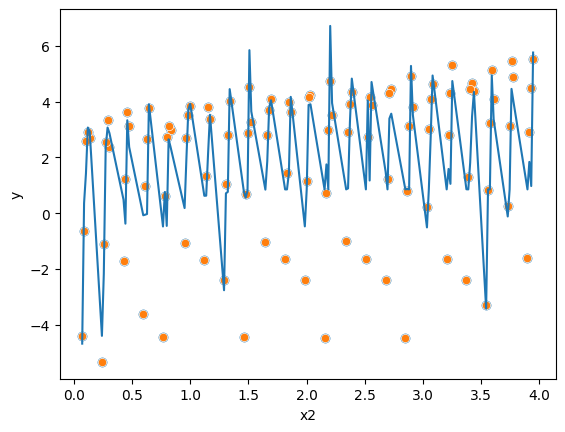

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x2"],df["y"])
sns.scatterplot(ax=ax, x=df["x2"], y=df["y"])
sns.lineplot(ax=ax, x=df["x2"], y=y_pred)

In [ ]:
print("mean squared error: ", mean_squared_error(df['y'], y_pred))
print("mean absolute error: ", mean_absolute_error(df['y'], y_pred))

mean squared error:  0.10351966695510034
mean absolute error:  0.26772883730168606


In [ ]:
#phi = create_matrix(df[['x3']], mu, sigma)
model = LinearRegression()
model.fit(phi, y)
y_pred = model.predict(phi)

<Axes: xlabel='x3', ylabel='y'>

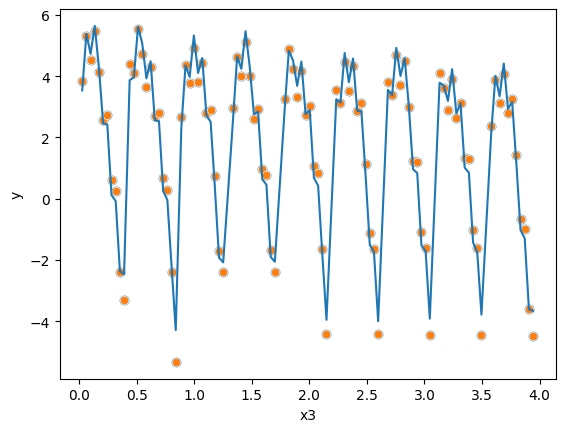

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["x3"],df["y"])
sns.scatterplot(ax=ax, x=df["x3"], y=df["y"])
sns.lineplot(ax=ax, x=df["x3"], y=y_pred)

In [ ]:
print("mean squared error: ", mean_squared_error(df['y'], y_pred))
print("mean absolute error: ", mean_absolute_error(df['y'], y_pred))

mean squared error:  0.10351966695510034
mean absolute error:  0.26772883730168606
